#  K-Nearest Neighbors (KNN) Classification

### Importing Iris dataset

In [25]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# View dataset
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### Normalize the features

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### Split into Train/Test Sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Experiment with different values of K.

##### Evaluation using cross validation

In [16]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')  # 10-fold CV
    mean_score = scores.mean()
    cv_scores.append(mean_score)
    print(f"k = {k}, Cross-Validated Accuracy = {mean_score:.4f}")

k = 1, Cross-Validated Accuracy = 0.9533
k = 2, Cross-Validated Accuracy = 0.9533
k = 3, Cross-Validated Accuracy = 0.9533
k = 4, Cross-Validated Accuracy = 0.9467
k = 5, Cross-Validated Accuracy = 0.9533
k = 6, Cross-Validated Accuracy = 0.9667
k = 7, Cross-Validated Accuracy = 0.9533
k = 8, Cross-Validated Accuracy = 0.9667
k = 9, Cross-Validated Accuracy = 0.9533
k = 10, Cross-Validated Accuracy = 0.9600
k = 11, Cross-Validated Accuracy = 0.9467
k = 12, Cross-Validated Accuracy = 0.9467
k = 13, Cross-Validated Accuracy = 0.9533
k = 14, Cross-Validated Accuracy = 0.9600
k = 15, Cross-Validated Accuracy = 0.9600
k = 16, Cross-Validated Accuracy = 0.9667
k = 17, Cross-Validated Accuracy = 0.9467
k = 18, Cross-Validated Accuracy = 0.9533
k = 19, Cross-Validated Accuracy = 0.9400
k = 20, Cross-Validated Accuracy = 0.9467


###### Cross-Validation is a good way to find the best value of k is by using k-fold cross-validation. This means dividing the dataset into k parts. The model is trained on some of these parts and tested on the remaining ones. This process is repeated for each part. The k value that gives the highest average accuracy during these tests is usually the best one to use.

###### k=6,8,16 has highest accuracy. But as odd values are preferred, we choose k=15 with accuracy 96%

##### Evaluation using Elbow method

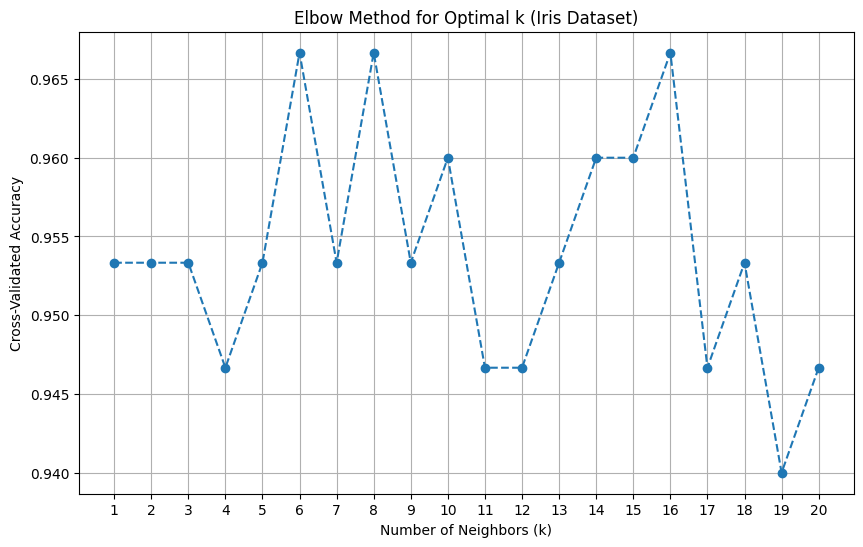

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (Iris Dataset)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

######  Most plots show that the best choice of k lies between 5 and 14. The most consistent "elbow" is at k = 5 (first, second, and fourth plots). However, some plots also suggest an alternative elbow at k = 14–15 (third and last plots).

######  The best k is k = 5 based on consistent results in several plots.
###### Alternatively, if your model's stability or dataset supports higher values, k = 14 or 15 could also be considered.

##### Confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#### Visualization of decision boundaries

In [22]:
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_decision_boundary(ax, X, y, feature1, feature2, k=5):
    # Extract features
    X_plot = X[[feature1, feature2]].values
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_plot, y)
    
    # Create mesh grid
    x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
    y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, alpha=0.2, cmap=cmap_light)


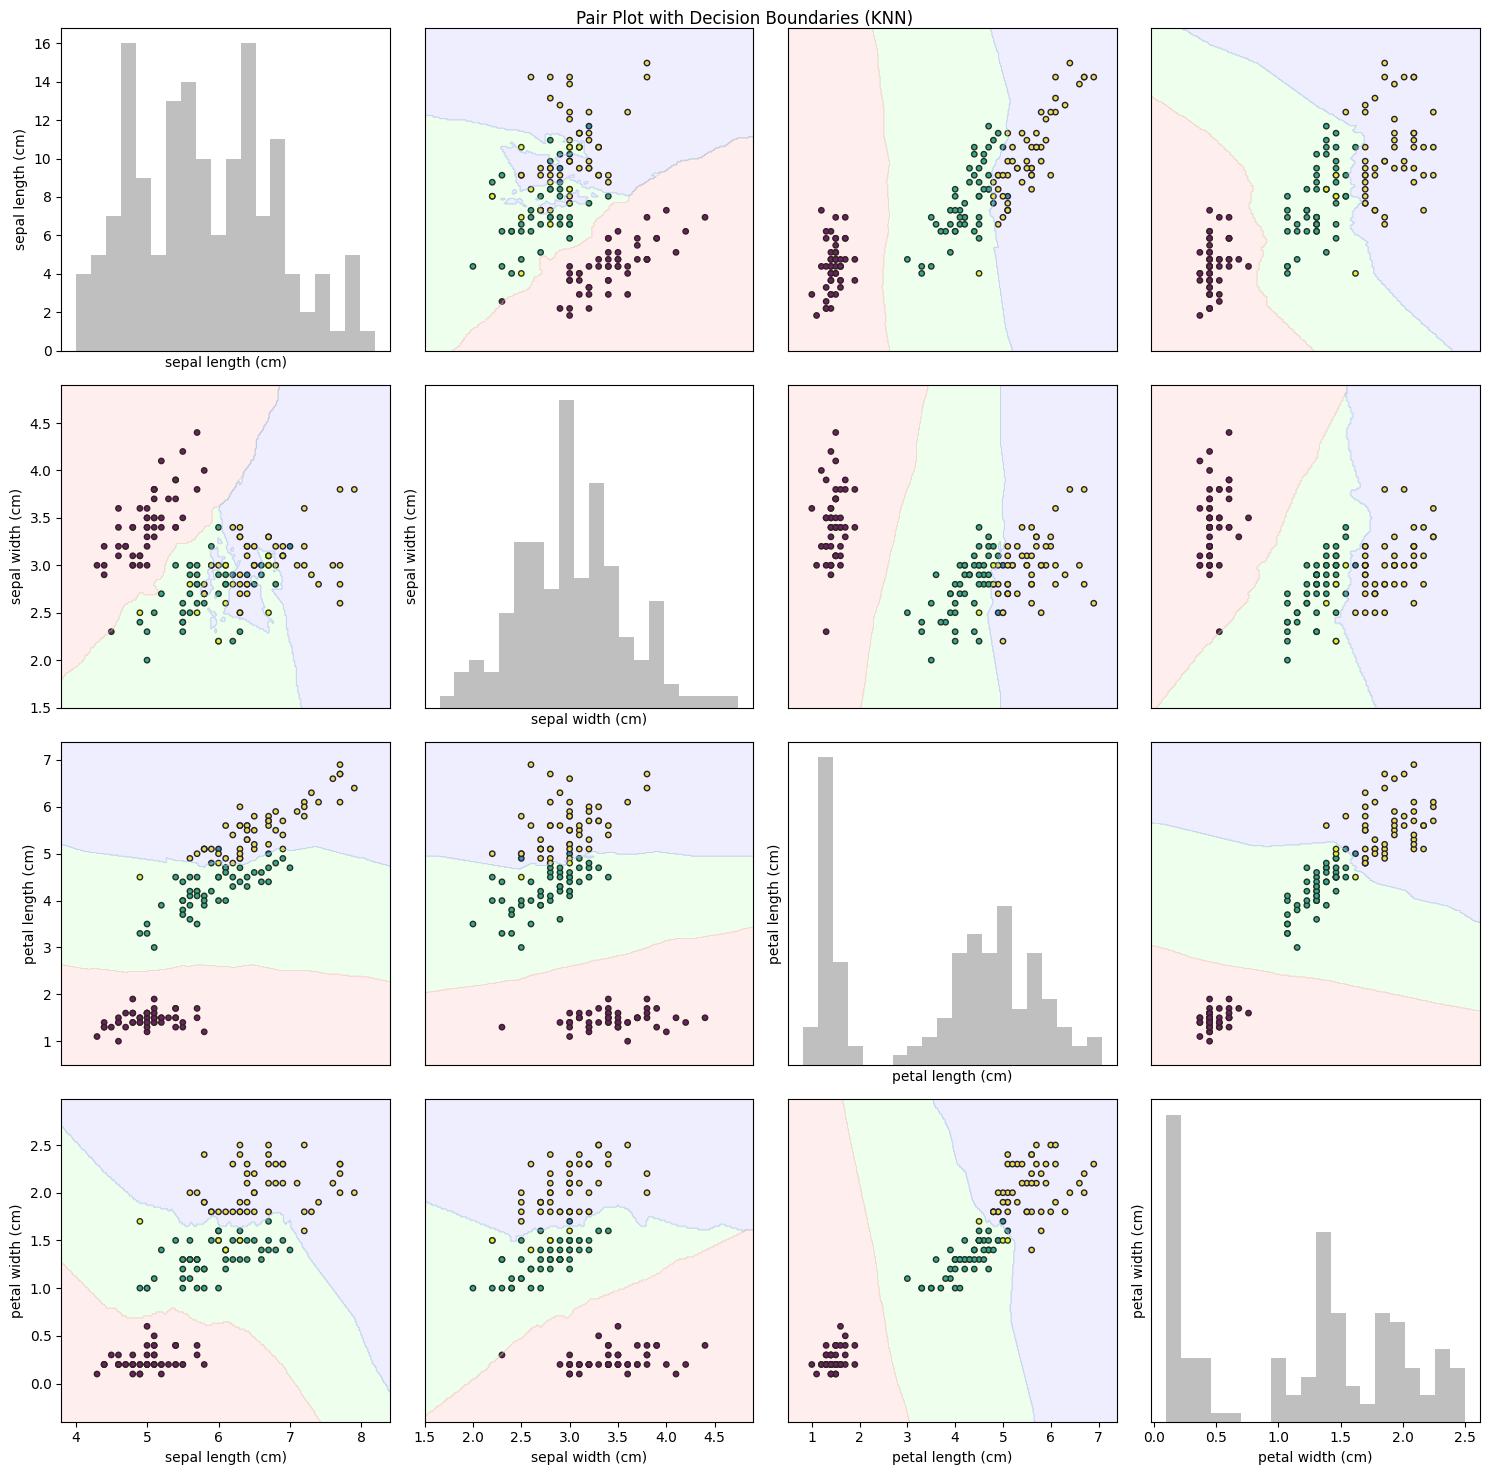

In [26]:
features = X.columns
fig, axes = plt.subplots(len(features), len(features), figsize=(15, 15))

for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        ax = axes[i, j]
        if i == j:
            # Plot histogram on the diagonal
            ax.hist(X[feature1], bins=20, color='gray', alpha=0.5)
            ax.set_xlabel(feature1)
            ax.set_ylabel(feature1)
        else:
            # Plot scatter points
            scatter = ax.scatter(X[feature2], X[feature1], c=y, cmap='viridis', s=15, edgecolor='k')
            # Plot decision boundary
            plot_decision_boundary(ax, X, y, feature2, feature1, k=5)
        if i == len(features) - 1:
            ax.set_xlabel(feature2)
        else:
            ax.set_xticks([])
        if j == 0:
            ax.set_ylabel(feature1)
        else:
            ax.set_yticks([])

plt.suptitle('Pair Plot with Decision Boundaries (KNN)')
plt.tight_layout()
plt.show()
